# K-Means对客户进行分类实战

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('consumption/x.txt')

In [3]:
data.shape

(940, 3)

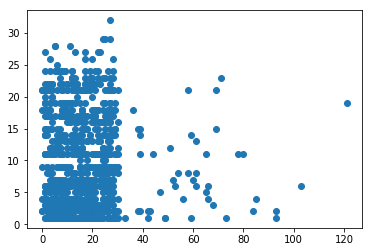

In [4]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

### 1、标准化

In [5]:
from ML.preprocessing import StandardScaler

In [6]:
standardScaler = StandardScaler()
standardScaler.fit(data)
X = standardScaler.transform(data)

In [7]:
X.shape

(940, 3)

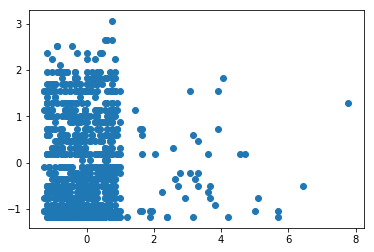

In [8]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### 2、确定K的取值，将样本分为 k 个类别（簇）

In [9]:
k = 3
center = np.zeros((k, X.shape[1]))
center

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### 3、随机初始化 k 个聚类中心（质心）

In [10]:
# c = min + rand(0, 1) * (max - min)
np.random.seed(601)
for i in range(center.shape[1]):
    max_val = X[:, i].max()
    min_val = X[:, i].min()
    center[:, i] = np.ones(k) * min_val + np.random.rand(k) * (max_val - min_val)
center

array([[ 1.75875622e-03,  2.99365779e+00,  5.45192484e+00],
       [ 7.67019012e+00, -5.02385500e-01,  2.94442909e+00],
       [ 2.94052906e+00, -1.15924657e+00,  6.09560424e+00]])

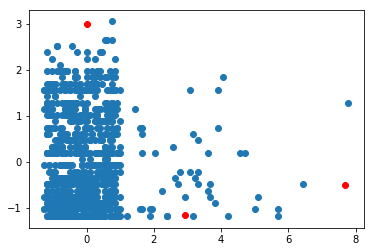

In [11]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(center[:, 0], center[:, 1], color='r')
plt.show()

### 4、计算各特征的点到聚类中心的距离

In [12]:
def distance(a, b):
    return np.sum(np.abs(a - b) ** 2)

In [13]:
label = []
for i in range(X.shape[0]):
    temp = []
    for j in range(k):
        temp.append(distance(X[i, :], center[j, :]))
    label.append(np.argsort(temp)[0])
label = np.array(label)

In [14]:
label.shape

(940,)

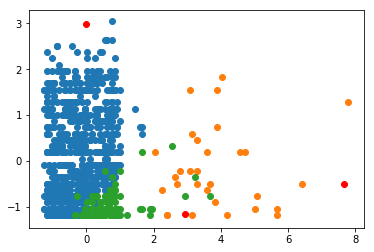

In [15]:
plt.scatter(X[label == 0, 0], X[label == 0, 1])
plt.scatter(X[label == 1, 0], X[label == 1, 1])
plt.scatter(X[label == 2, 0], X[label == 2, 1])
plt.scatter(center[:, 0], center[:, 1], color='r')
plt.show()

### 5、调整聚类中心的位置

In [16]:
def new_center(X, label, k):
    center = np.zeros((k, X.shape[1]))
    for col in range(X.shape[1]):
        for i in range(k):
            center[i, col] = X[label == i, col].mean()
    return center

In [17]:
center = new_center(X, label, k)

In [18]:
center

array([[-0.25321307,  0.17496107, -0.00943551],
       [ 3.84221882, -0.17061919, -0.00477222],
       [ 0.61263149, -0.98365544,  0.05619971]])

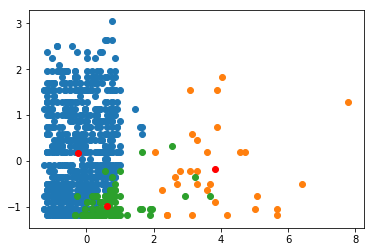

In [19]:
plt.scatter(X[label == 0, 0], X[label == 0, 1])
plt.scatter(X[label == 1, 0], X[label == 1, 1])
plt.scatter(X[label == 2, 0], X[label == 2, 1])
plt.scatter(center[:, 0], center[:, 1], color='r')
plt.show()

### 6、循环第 4、5 步

In [20]:
def kmeans(X, k, center):
    label = []
    for i in range(X.shape[0]):
        temp = []
        for j in range(k):
            temp.append(distance(X[i, :], center[j, :]))
        label.append(np.argsort(temp)[0])
    return np.array(label)

In [21]:
label = kmeans(X, k, center)

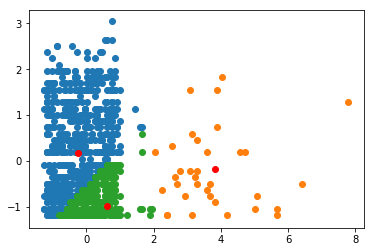

In [22]:
plt.scatter(X[label == 0, 0], X[label == 0, 1])
plt.scatter(X[label == 1, 0], X[label == 1, 1])
plt.scatter(X[label == 2, 0], X[label == 2, 1])
plt.scatter(center[:, 0], center[:, 1], color='r')
plt.show()

In [23]:
while True:
    c = new_center(X, label, k)
    label = kmeans(X, k, c)
    
    if (c == center).all():
        break
    else:
        center = c

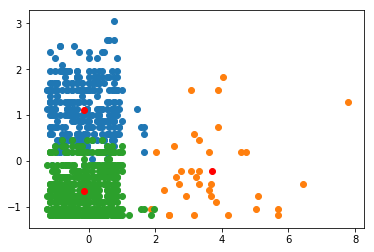

In [24]:
plt.scatter(X[label == 0, 0], X[label == 0, 1])
plt.scatter(X[label == 1, 0], X[label == 1, 1])
plt.scatter(X[label == 2, 0], X[label == 2, 1])
plt.scatter(center[:, 0], center[:, 1], color='r')
plt.show()

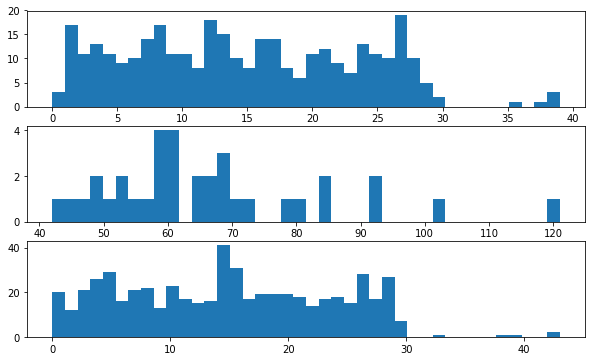

In [25]:
plt.figure(figsize = (10, 6))

plt.subplot(3, 1, 1)
plt.hist(data[label==0, 0], bins=40)

plt.subplot(3, 1, 2)
plt.hist(data[label==1, 0], bins=40)

plt.subplot(3, 1, 3)
plt.hist(data[label==2, 0], bins=40)

plt.show()

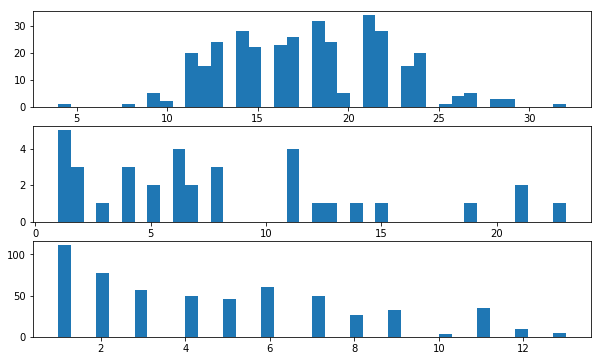

In [26]:
plt.figure(figsize = (10, 6))

plt.subplot(3, 1, 1)
plt.hist(data[label==0, 1], bins=40)

plt.subplot(3, 1, 2)
plt.hist(data[label==1, 1], bins=40)

plt.subplot(3, 1, 3)
plt.hist(data[label==2, 1], bins=40)

plt.show()

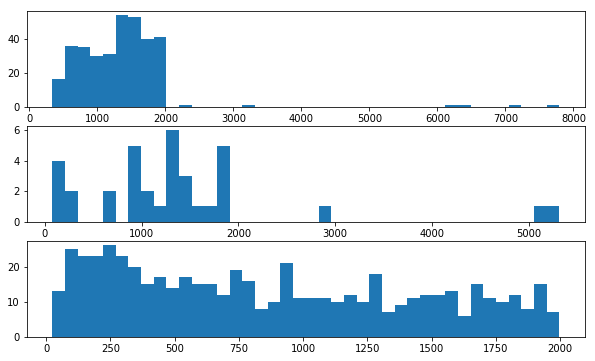

In [27]:
plt.figure(figsize = (10, 6))

plt.subplot(3, 1, 1)
plt.hist(data[label==0, 2], bins=40)

plt.subplot(3, 1, 2)
plt.hist(data[label==1, 2], bins=40)

plt.subplot(3, 1, 3)
plt.hist(data[label==2, 2], bins=40)

plt.show()